In [1]:
%load_ext autoreload
%autoreload 2

In [451]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [459]:
indices = {
  0:  "year",
  1:  "school",
  4:  "exam-score",
  6:  "%FSM",
  8:  "%VR1-band",
  10: "gender",
  11: "student-vr-band",
  12: "ethnic-group",
  14: "school-gender",
  15: "school-denomination"
}

with open("../data/ILEA567.DAT") as datafile:
  data = []
  for line in map(str.rstrip, datafile):
    line_data = []
    next_idx = len(line)
    for idx in sorted(indices, reverse=True):
      line_data.append(int(line[idx:next_idx].strip()))
      next_idx = idx
    data.append(line_data[::-1])
    
data = np.asarray(data)
feature_names = [name for idx, name
                 in sorted(indices.items())]

In [460]:
labels = data[:, 2]
data = np.delete(data, 2, -1)

feature_names.remove("exam-score")
print(feature_names)

['year', 'school', '%FSM', '%VR1-band', 'gender', 'student-vr-band', 'ethnic-group', 'school-gender', 'school-denomination']


In [461]:
categories = [
  [1, 2, 3],
  [0, 1],
  [1, 2, 3],
  list(range(1, 12)),
  [1, 2, 3],
  [1, 2, 3]
]

encoder = OneHotEncoder(categories=categories, sparse=False, handle_unknown='ignore')
data = np.hstack([data[:, 1:2], 
                  encoder.fit_transform(np.hstack([data[:, :1], data[:, 4:]])),
                  data[:, 2:4]])
categorical_feature_names = [f"{f}-{c}" 
                             for i, f in enumerate(feature_names[:1] + feature_names[4:])
                             for c in categories[i]]
feature_names = ['school'] + categorical_feature_names + feature_names[2:4]

In [462]:
split_sizes = np.cumsum(np.unique(data[:, 0], return_counts=True)[1])[:-1]
features = np.asarray(np.split(data[:, 1:], split_sizes))
labels = np.asarray(np.split(labels, split_sizes))
feature_names.pop(0);

In [434]:
assert sum(features[i].shape[0] for i in range(features.shape[0])) == data.shape[0]
assert sum(labels[i].shape[0] for i in range(labels.shape[0])) == data.shape[0]

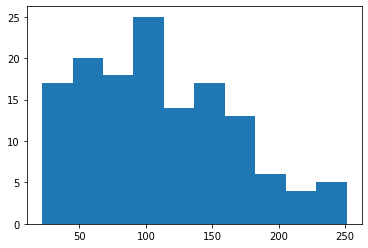

In [435]:
plt.hist([features[i].shape[0] for i in range(len(features))]);

In [436]:
np.savez("../data/school.npz", features=features, labels=labels)